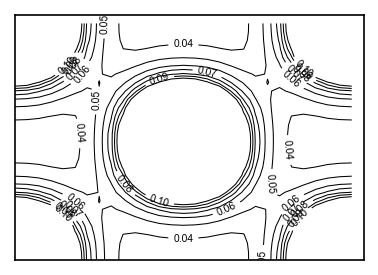

<Figure size 640x480 with 0 Axes>

In [10]:
import os
import sys
import subprocess
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.colors as mcolors

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
#------------------------------------------------------------------------

#### Read data file
def read_cdn(file_path, x_column, y_column, z_column, f_column):
    x_value = []
    y_value = []
    z_value = []
    f_value = []
    with open(file_path, 'r') as file:
        for line in file:
            data = line.strip().split()
            if len(data) != 0 and data[0] != '#':
                if len(data) >= max(x_column, y_column, z_column, f_column):
                    x_value.append(float(data[x_column - 1]))
                    y_value.append(float(data[y_column - 1]))
                    z_value.append(float(data[z_column - 1]))
                    f_value.append(float(data[f_column - 1]))
    return x_value, y_value, z_value, f_value
#------------------------------------------------------------------------

### MAIN PROGRAM
if __name__ == '__main__':
    
    ### SETTING #########################################################
    # set length in x, y, (z) axes
    result = subprocess.run(["grep","# r1,r2,r3=","./den.xy"], capture_output=True, text=True)
    lines = result.stdout.strip().split()
    xlen = float(lines[2])
    ylen = float(lines[3])
    zlen = float(lines[4])

    # set number of grids in x, y, (z) axes
    result = subprocess.run(["grep","# n1,n2,n3","./den.xy"], capture_output=True, text=True)
    lines = result.stdout.strip().split()
    xnum = int(lines[2])
    ynum = int(lines[3])
    znum = int(lines[4])
    xmin_plot=0; xmax_plot=xnum; xnum_plot=xnum-1
    ymin_plot=0; ymax_plot=ynum; ynum_plot=ynum-1
    zmin_plot=0; zmax_plot=znum; znum_plot=znum-1

    # f-axis for electron density
    fmin_plot=0.0; fmax_plot=1.0
    #fnum_plot=[2**-6,2**-5,2**-4,2**-3,2**-2,2**-1,2**0,2**1,2**2,2**3,2**4,2**5,2**6]; zfmt_plot='%.2f'
    fnum_plot=[0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10]; zfmt_plot='%.2f'

    # define plt
    fig = plt.figure(dpi=150,figsize=(3,3*ylen/xlen))

    # set column in den.xy
    file_data = './den.xy'
    xcol_data = 1                      #x-axis
    ycol_data = 2                      #y-axis
    zcol_data = 3                      #z-axis
    fcol_data = 5                      #f-axis electron density

    ### READ DATA #########################################################
    # read den.xy
    x_plot, y_plot, z_plot, f_plot = read_cdn(file_data, xcol_data, ycol_data, zcol_data, fcol_data)
    #print('fmin=',np.min(f_plot),'  ffmax=',np.max(f_plot))    

    ### FIGURE #########################################################
    # create meshgrid for plotting
    x = np.linspace(xmin_plot, xmax_plot, num=xnum_plot)
    y = np.linspace(ymin_plot, ymax_plot, num=ynum_plot)
    X, Y = np.meshgrid(x, y)

    # Interpolate z_plot to match the size of X and Y
    points = np.column_stack((x_plot, y_plot))
    Z = griddata(points, f_plot, (X, Y), method='cubic')

    # create contour plot
    cs=plt.contour(X, Y, Z, levels=fnum_plot, vmin=fmin_plot, vmax=fmax_plot, colors='black', linewidths=0.5)
    plt.clabel(cs, fmt=zfmt_plot, fontsize=5)

    # Set axis
    plt.xticks([])
    plt.yticks([]) 

    ### save/draw figure
    plt.savefig('fig_cdn2d.png',format='png',bbox_inches='tight',transparent=True)
    plt.show()
    plt.clf()